## importing dependencies 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

### importing the training data of historical prices

In [2]:
data = pd.read_csv('TATASTEEL.csv') 
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-19,42.396778,43.849705,41.501209,42.944603,32.951366,115128667.0
1,2014-05-20,43.206608,45.193062,43.206608,44.507092,34.150257,95506487.0
2,2014-05-21,44.583309,44.811966,43.559120,44.068832,33.813988,57589188.0
3,2014-05-22,44.302254,45.521755,44.297489,44.864368,34.424400,61048654.0
4,2014-05-23,44.969170,46.017178,44.716694,45.559868,34.958057,59767964.0
...,...,...,...,...,...,...,...
1893,2022-01-19,119.599998,122.089996,118.300003,120.959999,111.139786,73043210.0
1894,2022-01-20,121.010002,122.400002,119.699997,120.669998,110.873329,59205970.0
1895,2022-01-21,120.000000,120.430000,115.635002,116.970001,107.473724,71662670.0
1896,2022-01-24,116.000000,116.364998,109.000000,109.919998,100.996078,83920760.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1898 non-null   object 
 1   Open       1897 non-null   float64
 2   High       1897 non-null   float64
 3   Low        1897 non-null   float64
 4   Close      1897 non-null   float64
 5   Adj Close  1897 non-null   float64
 6   Volume     1897 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.9+ KB


## choosing the close column 


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training


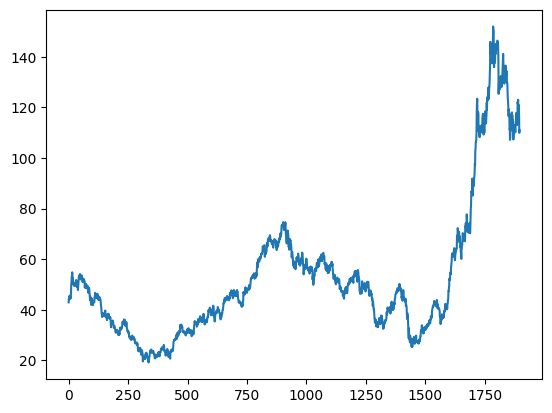

In [5]:
plt.plot(trainData)

## scaling the values in the range of 0-1 for best preformances 

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1897, 1)

## preparing the data for LSTM
 since its a time series problem we took 60 as timestep for our learning : given *80 closing values* as an input data the *81st value* is our output

In [7]:
X_train = []
y_train = []

for i in range (80,1798): #80 : timestep // 1798 : length of the data
    X_train.append(trainData[i-80:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1718, 80, 1)

## building the model 

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
hist = model.fit(X_train, y_train, epochs = 30, batch_size = 100, verbose=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - loss: 0.0264
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - loss: 0.0023
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - loss: 0.0016
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - loss: 0.0016
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - loss: 0.0013
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - loss: 0.0014
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - loss: 0.0013
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - loss: 0.0014
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - loss: 0.0010   
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - loss: 0.0011
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - loss: 0.0013
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - loss: 9.8428e-04
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - loss: 0.0012
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 0.0010 
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/s

### ploting the training loss


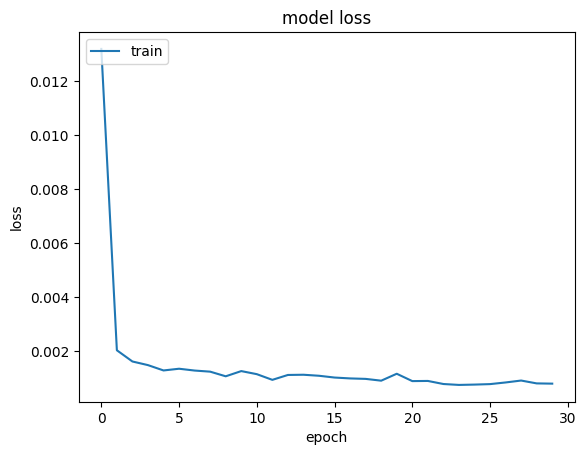

In [11]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### testing the model on new data


In [12]:
testData = pd.read_csv('TATASTEEL_test.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[80:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 80
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(489, 80, 1)

In [13]:
y_pred = model.predict(X_test) #predicting the new values

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [14]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting 

### ploting the results

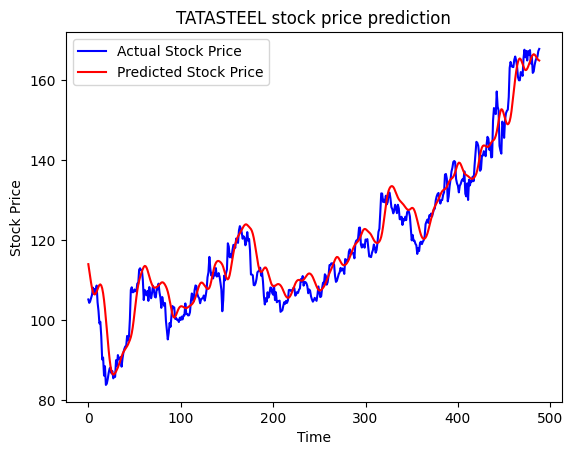

In [15]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('TATASTEEL stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()